#  HACKTIV 8 TALENT FAIR CHALLENGE WITH ARIA 

Melakukan prediksi nutrisi tanaman dengan menggunakan Linear Regression dan XGB Regressor 

# 1. Perkenalan 

Nama    : Ucik Refani Kurnia Sari

TTL     : Surakarta, 09 Agustus 1996

Alamat  : Surakarta / Solo


# External Link 

Dashboard : https://lookerstudio.google.com/reporting/5eee7bdb-bbe5-409f-ae06-5d4e807caf00

# Latar Belakang 
Nutrisi tanaman adalah suatu zat yang sangat penting bagi produksi tanaman pertanian yang menghasilkan makanan yang sehat untuk manusia. Nutrisi yang diserap untuk tanaman digunakan untuk pertumbuhan, perkembangan dan proses reproduksi tanaman. Nutrisi yang dibutuhkan tanaman digolongkan menjadi 2 bagian, yaitu nutrisi makro dan nutrisi mikro. Nutrisi makro seperti Nitrogen (N), Phospor (P), Kalium (K), Sulfur (S), Calsium (Ca), dan Magnesium (Mg), sedangkan nutrisi mikro seperti Klor (Cl), Zat besi (Fe), Mangan (Mn), Tembaga (Cu), Seng (Zn), Boron (B), Molindenum (Mo). 

# 2. Import Libraries 

In [1]:
#Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

#Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt


# 3. Loading data 

In [2]:
#Load data 
data = pd.read_excel('aria_data.xlsx')

In [3]:
data.head()

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.63,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333,lab 1
1,5.00,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,4.91,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,4.77,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,4.89,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1


In [4]:
data.tail()

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
155,4.83,573.2500,361.250000,643.125000,489.812500,666.875,355.250000,712.312500,3943.687500,lab 2
156,4.47,678.3750,398.125000,678.250000,541.125000,704.000,393.500000,788.812500,3928.187500,lab 2
157,4.63,634.0000,382.866667,657.466667,505.066667,719.200,366.600000,792.133333,3861.200000,lab 2
158,4.35,615.3125,366.750000,642.937500,483.687500,675.625,359.062500,730.125000,3859.062500,lab 2
159,4.43,575.2000,350.266667,648.333333,495.400000,679.800,346.266667,718.733333,3903.333333,lab 2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   target       160 non-null    float64
 1   v1           160 non-null    float64
 2   v2           160 non-null    float64
 3   v3           160 non-null    float64
 4   v4           160 non-null    float64
 5   v5           160 non-null    float64
 6   v6           160 non-null    float64
 7   v7           160 non-null    float64
 8   v8           160 non-null    float64
 9   sample_type  160 non-null    object 
dtypes: float64(9), object(1)
memory usage: 12.6+ KB


- terdapat 10 kolom dan 160 baris 
- tidak terdapat missing value pada setiap kolom. 
- dataset terdiri dari float dan object. 

# 4. Exploratory Data Analysis (EDA)

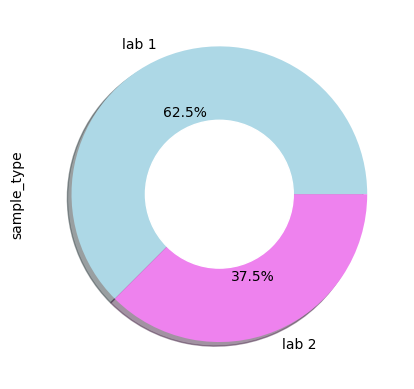

In [6]:
#Create pie chart
data['sample_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = ['lightblue', 'violet'])
#Plotting the donut chart
my_circle = plt.Circle((0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Sample type lab 1 lebih banyak hampir 2x lipat daripada lab 2. 

In [7]:
data.describe()

,target,v1,v2,v3,v4,v5,v6,v7,v8
count,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,4.73375,389.892437,237.442677,480.573041,394.109622,487.316520,251.450820,714.737926,4456.913233
std,0.21405,148.673511,70.128690,118.798984,63.060442,100.941711,59.634652,51.148098,335.035933
min,4.13000,227.285714,178.800000,348.933333,313.733333,373.333333,189.200000,586.266667,3725.666667
25%,4.60000,268.608333,194.029018,384.419643,353.181250,418.583333,213.000000,678.385417,4273.437500
50%,4.72000,295.162500,204.187500,414.383929,370.741667,456.031250,226.062500,718.833333,4554.766667
75%,4.89000,536.409375,244.716667,591.611404,424.131250,496.475000,262.531250,751.446875,4700.612500
max,5.26000,678.375000,422.812500,722.312500,558.500000,721.000000,415.375000,853.466667,5086.375000


Tidak terdapat missing value pada setiap kolom. Target memiliki mean memiliki mean kurang lebih hampir sama dengan 50%nya. sehingga dapat dikatakan data terdistribusi normal. 

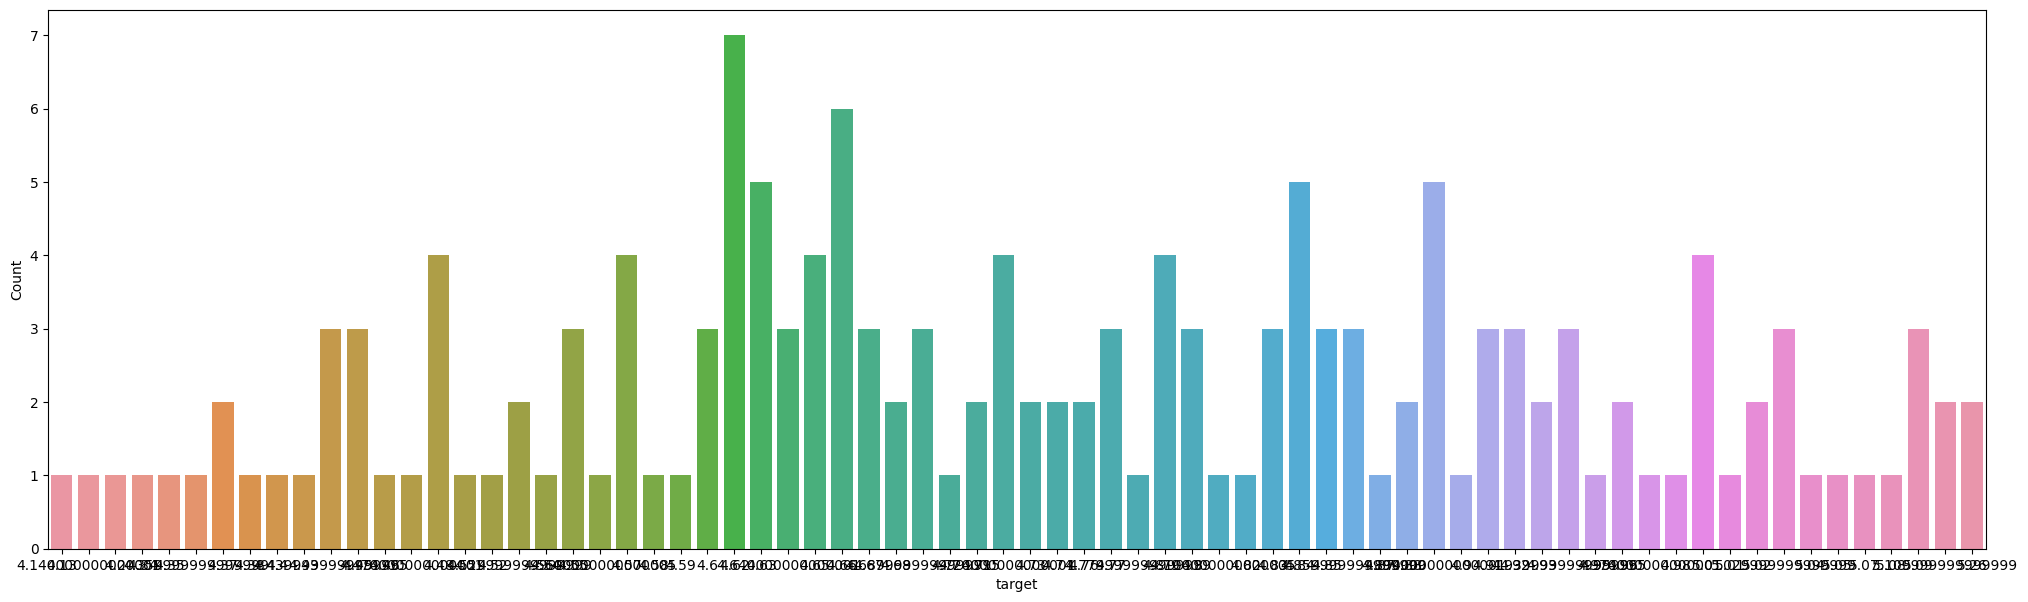

In [8]:
plt.figure(figsize=(25,7))
age=data['target'].value_counts().reset_index()
sns.barplot(x='index',y='target',data=age,orient='v')
plt.xlabel("target")
plt.ylabel("Count")
plt.show()

nilai target terbanyak adalah 4.62 dan 4.66

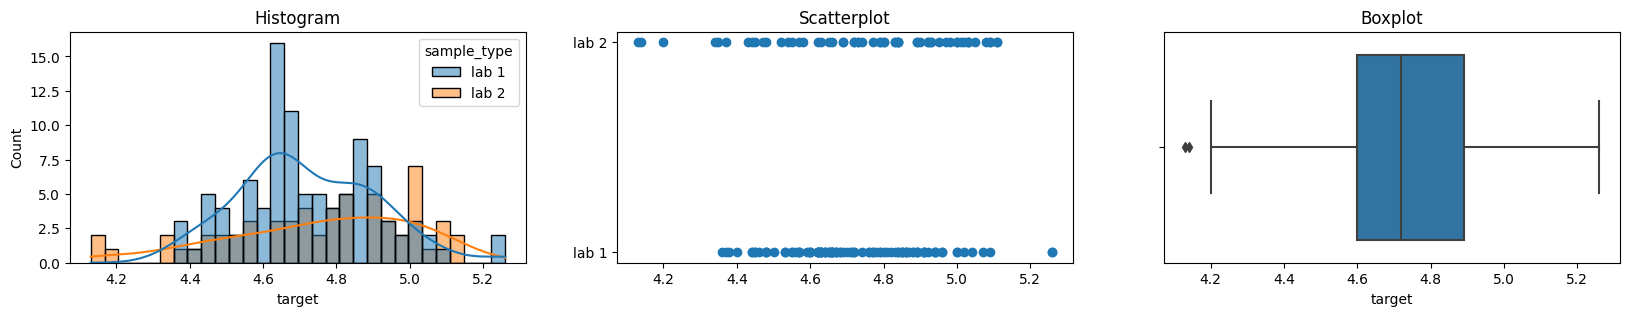

target


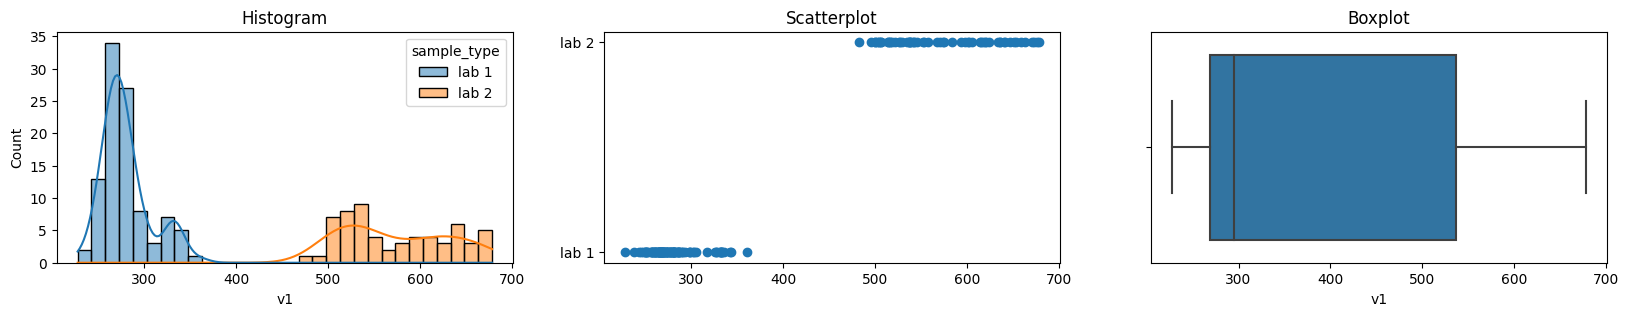

v1


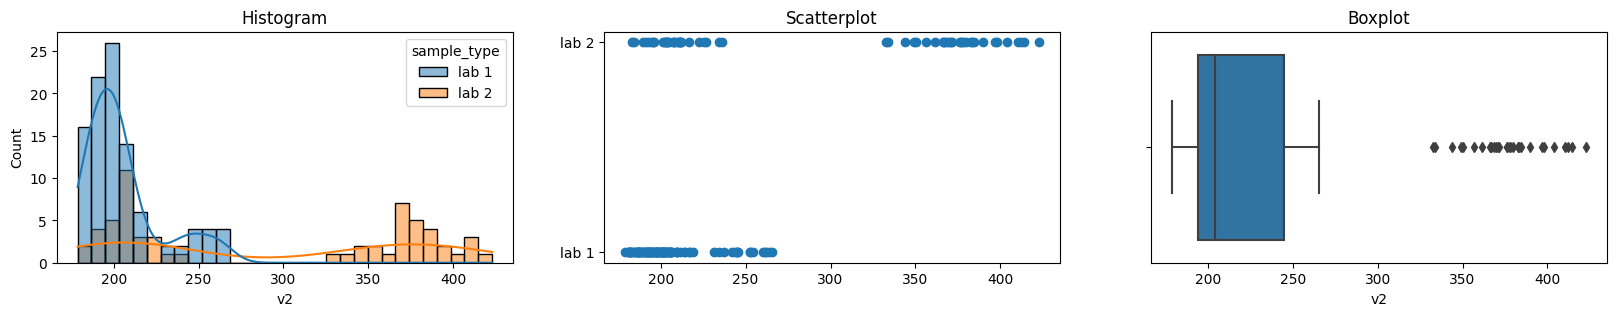

v2


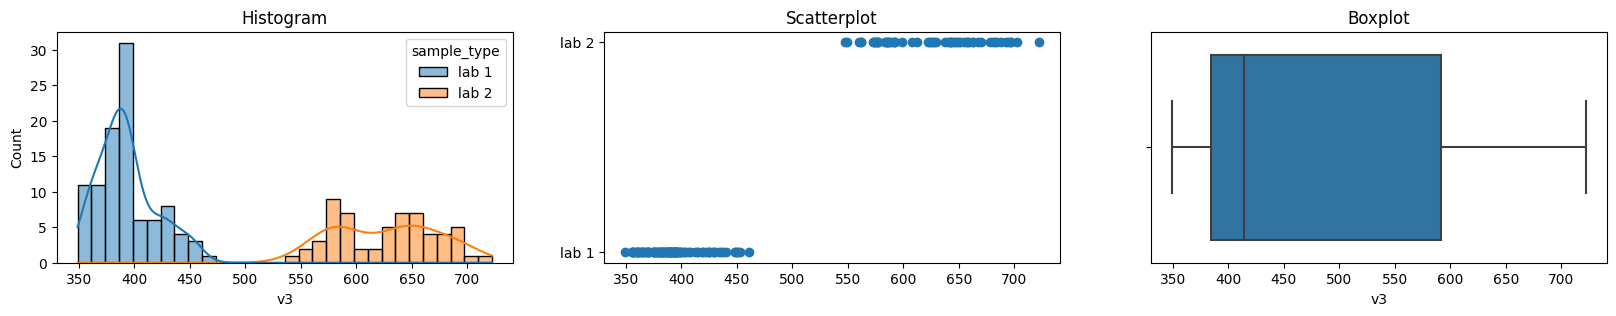

v3


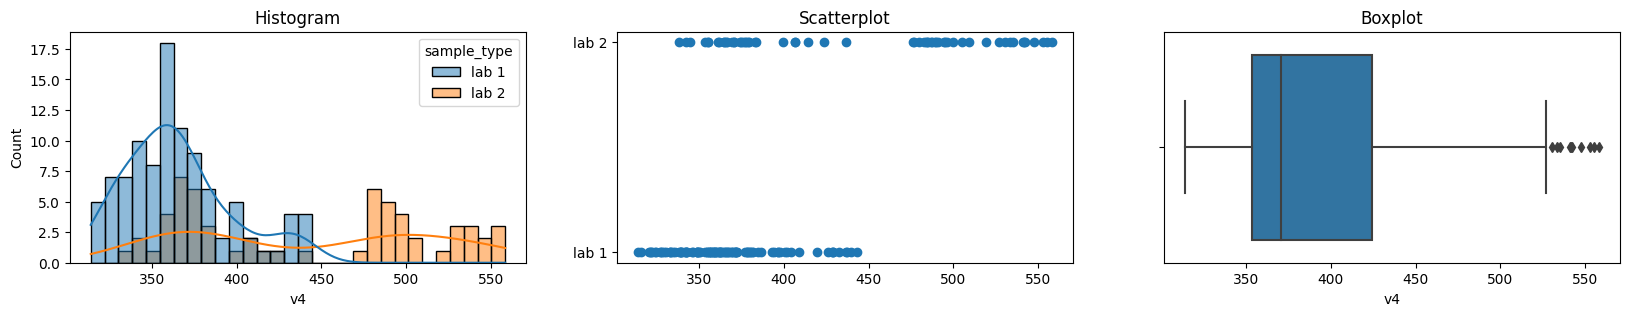

v4


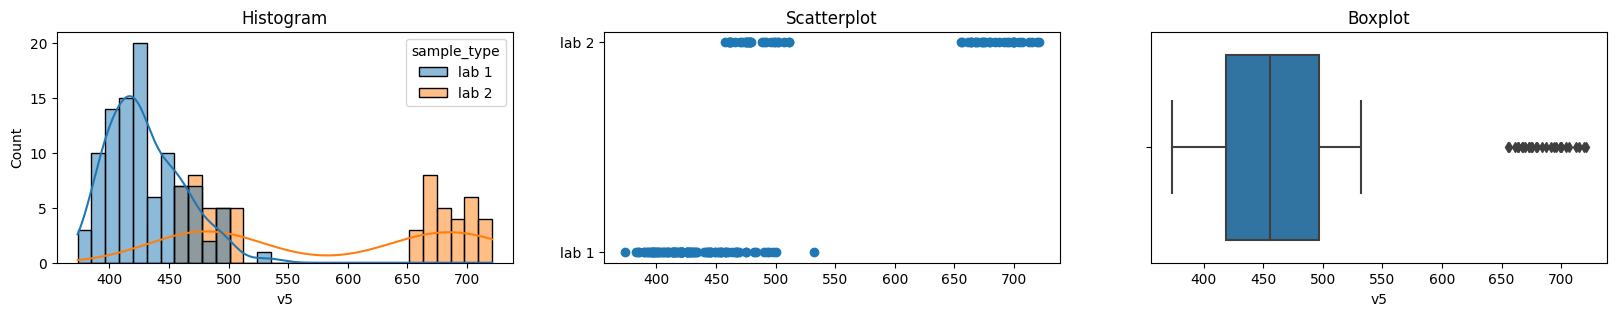

v5


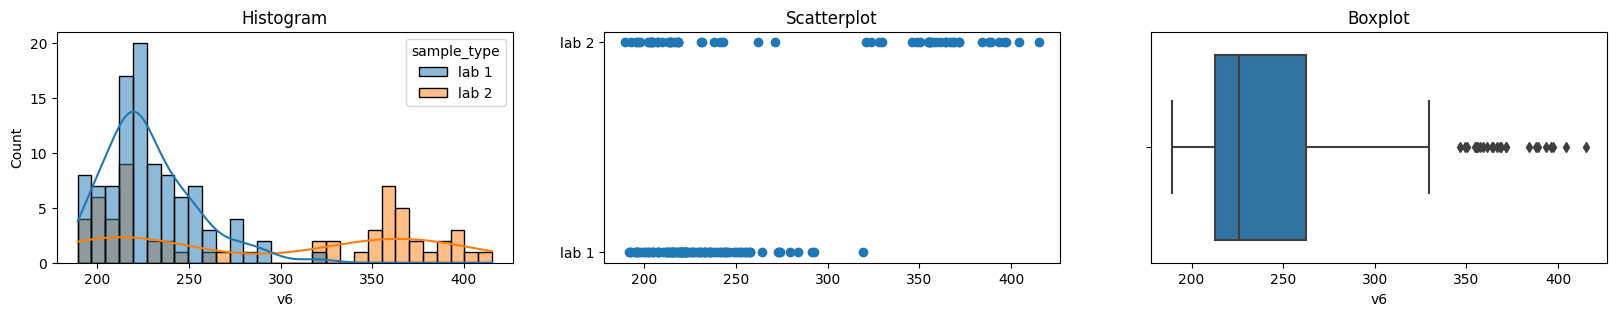

v6


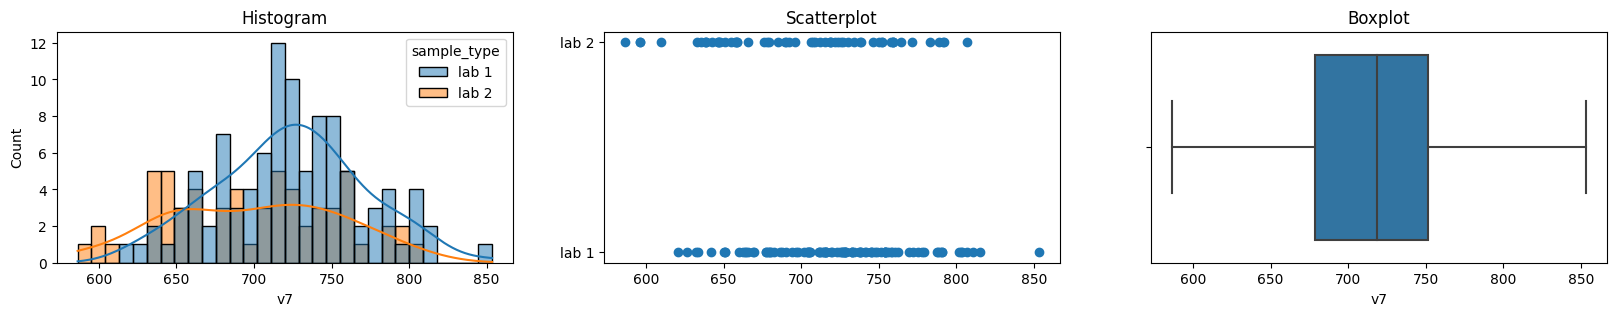

v7


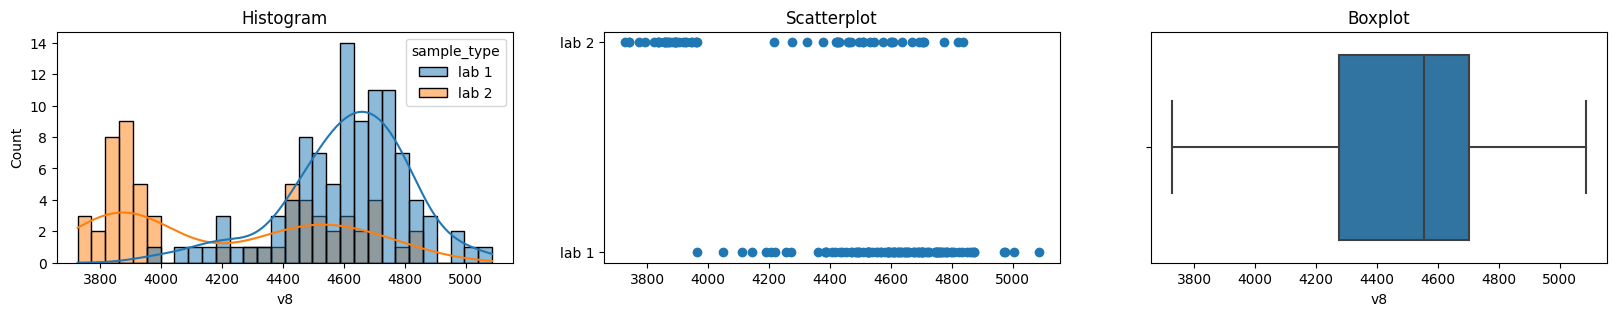

v8


In [9]:
def show_plots(data, feature, label):
    
    plt.figure(figsize=(20, 3))
    
    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(data=data, x=feature, hue=label, bins=30, kde=True)
    plt.title('Histogram')


    # scatterplot
    plt.subplot(1, 3, 2)
    plt.scatter(data[feature], data[label])
    plt.title('Scatterplot')
    
    
    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(x=data[feature])
    plt.title('Boxplot')
    
    
    plt.show()

# showing plots for all features
for col in data.columns[:-1]:
    show_plots(data, col, data.columns[-1])
    print(col)

terlihat bahwa beberapa data terdistribusi normal seperti kolom target dan v7. namun, beberapa kolom memiliki banyak outlier misalnya kolom v2, v4, v5, dan v6. 

# 5. Data Preprocessing 

## 5.1 Data untuk Model Inference 

In [10]:
#Get Data for model inference
data_inf = data.sample(10, random_state = 20)
data_inf

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
155,4.83,573.250000,361.250000,643.125000,489.812500,666.875000,355.250000,712.312500,3943.687500,lab 2
57,5.04,276.125000,197.562500,389.500000,365.625000,444.812500,235.312500,723.062500,4359.437500,lab 1
98,4.89,316.687500,245.250000,451.250000,436.437500,500.187500,291.437500,807.000000,4762.625000,lab 1
88,4.67,332.687500,241.937500,422.312500,400.437500,463.125000,248.687500,726.937500,4625.500000,lab 1
135,4.37,605.200000,376.466667,696.266667,533.666667,687.600000,387.800000,764.266667,3853.133333,lab 2
34,4.70,281.666667,190.933333,364.066667,323.933333,385.333333,214.133333,662.733333,4437.866667,lab 1
87,4.62,360.666667,261.666667,452.400000,443.200000,490.600000,274.000000,787.333333,4784.666667,lab 1
147,4.72,670.133333,378.000000,694.000000,542.400000,706.666667,371.533333,791.466667,3725.666667,lab 2
55,4.59,272.333333,205.000000,383.266667,366.666667,414.000000,222.333333,711.333333,4701.466667,lab 1
107,4.66,514.125000,205.000000,573.375000,364.562500,474.937500,209.750000,635.562500,4509.500000,lab 2


In [11]:
#Remove Inference-Set from Dataset
data_train_test = data.drop(data_inf.index)
data_train_test

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.63,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333,lab 1
1,5.00,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,4.91,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,4.77,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,4.89,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1
...,...,...,...,...,...,...,...,...,...,...
154,4.79,624.200000,377.666667,645.666667,486.733333,699.733333,364.400000,734.200000,3741.266667,lab 2
156,4.47,678.375000,398.125000,678.250000,541.125000,704.000000,393.500000,788.812500,3928.187500,lab 2
157,4.63,634.000000,382.866667,657.466667,505.066667,719.200000,366.600000,792.133333,3861.200000,lab 2
158,4.35,615.312500,366.750000,642.937500,483.687500,675.625000,359.062500,730.125000,3859.062500,lab 2


In [12]:
#Reset Index
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.83,573.250000,361.250000,643.125000,489.812500,666.875000,355.250000,712.312500,3943.687500,lab 2
1,5.04,276.125000,197.562500,389.500000,365.625000,444.812500,235.312500,723.062500,4359.437500,lab 1
2,4.89,316.687500,245.250000,451.250000,436.437500,500.187500,291.437500,807.000000,4762.625000,lab 1
3,4.67,332.687500,241.937500,422.312500,400.437500,463.125000,248.687500,726.937500,4625.500000,lab 1
4,4.37,605.200000,376.466667,696.266667,533.666667,687.600000,387.800000,764.266667,3853.133333,lab 2
5,4.70,281.666667,190.933333,364.066667,323.933333,385.333333,214.133333,662.733333,4437.866667,lab 1
6,4.62,360.666667,261.666667,452.400000,443.200000,490.600000,274.000000,787.333333,4784.666667,lab 1
7,4.72,670.133333,378.000000,694.000000,542.400000,706.666667,371.533333,791.466667,3725.666667,lab 2
8,4.59,272.333333,205.000000,383.266667,366.666667,414.000000,222.333333,711.333333,4701.466667,lab 1
9,4.66,514.125000,205.000000,573.375000,364.562500,474.937500,209.750000,635.562500,4509.500000,lab 2


## 5.2 Handling Outlier 

In [13]:
# function to calulcate the upper limit and lower limit from IQR
def outlier_limits(data, col):
    Q3 = data[col].quantile(0.75)
    Q1 = data[col].quantile(0.25)
    IQR = Q3 - Q1
    Upper_limit = Q3 + 1.5*IQR
    Lower_limit = Q1 - 1.5*IQR
    return Upper_limit, Lower_limit

In [14]:
# replacing outliers with either upper_limit (if outlier is greater than UL) or lower_limit (if outlier is less than LL)
for col in ['v2', 'v4', 'v5', 'v6']:
    Upper_limit, Lower_limit = outlier_limits(data, col)
    data[col] = np.where((data[col] > Upper_limit), Upper_limit, data[col])
    data[col] = np.where((data[col] < Lower_limit), Lower_limit, data[col])

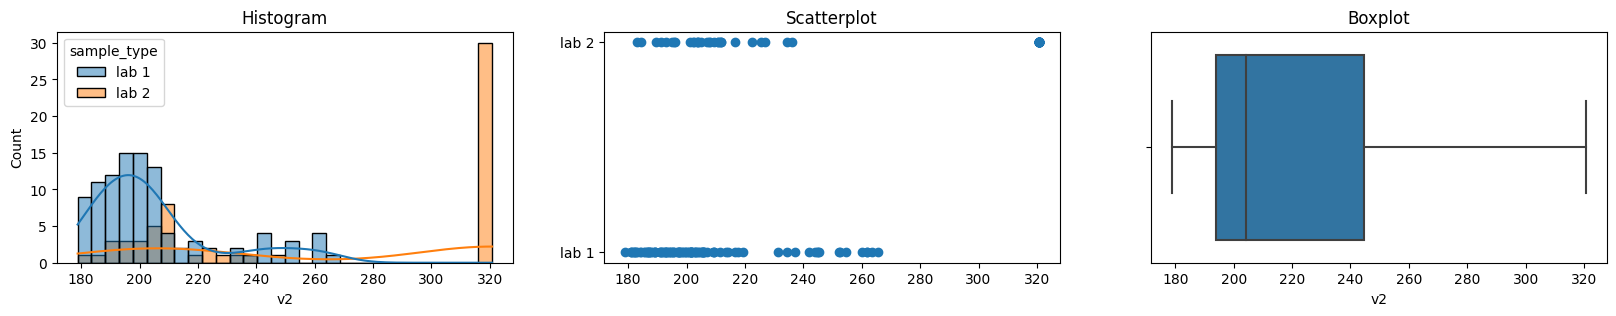

v2


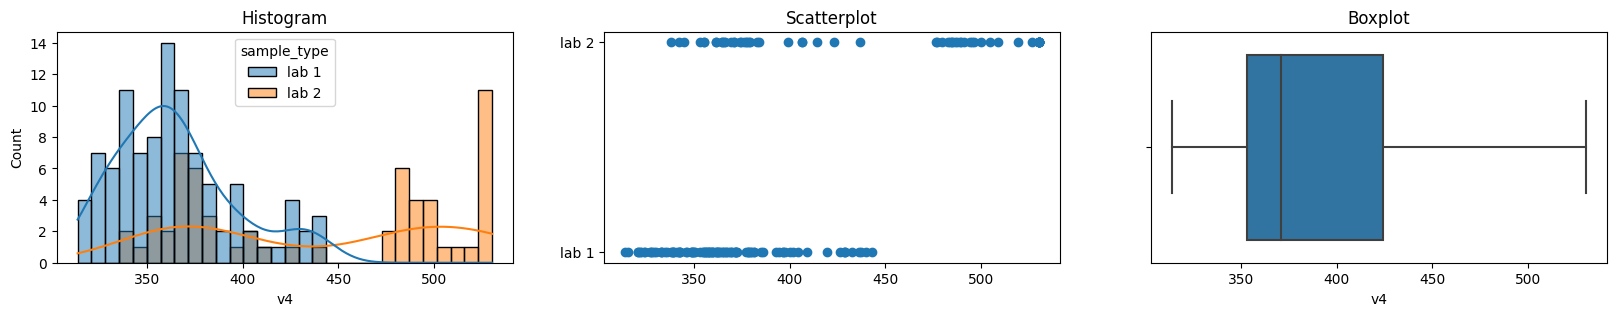

v4


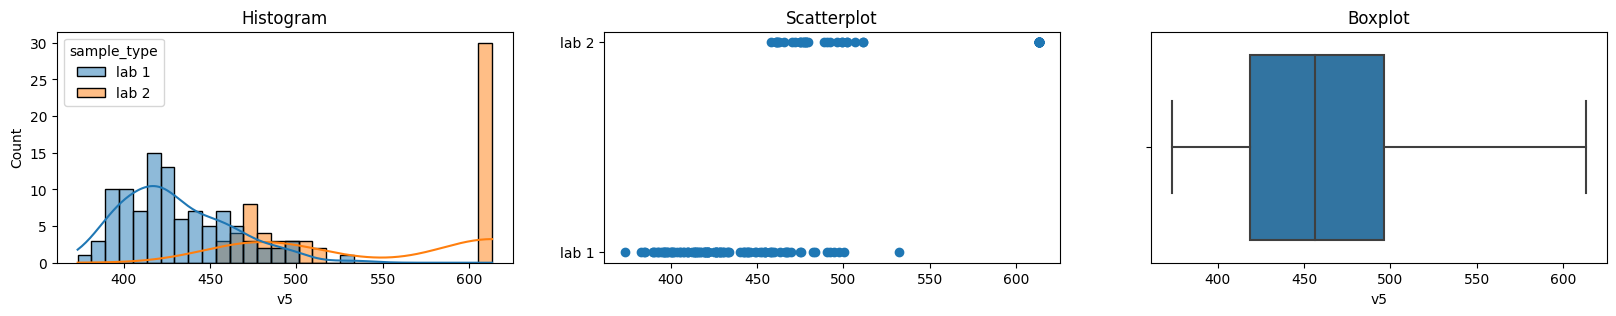

v5


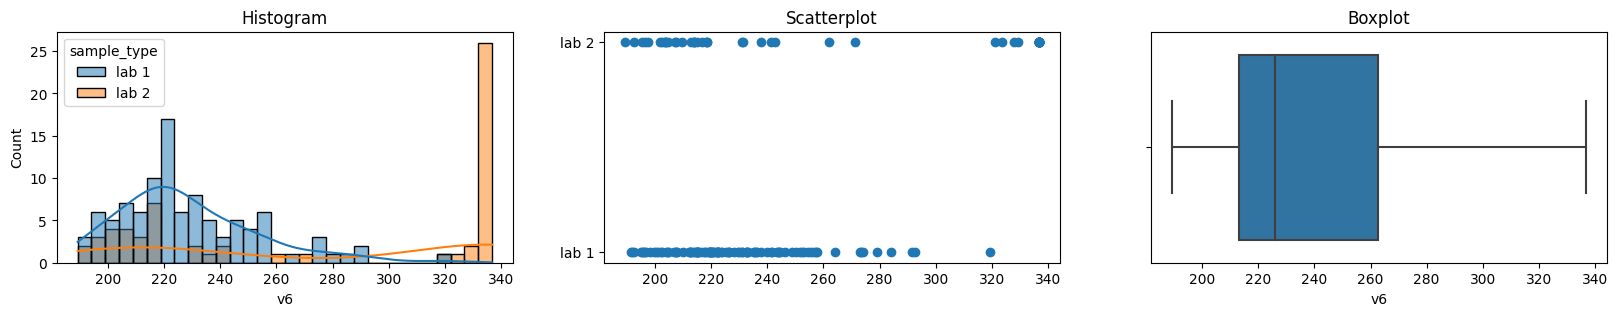

v6


In [15]:
# plotting graphs columns again after handling outliers
for col in ['v2', 'v4', 'v5', 'v6']:
    show_plots(data, col, data.columns[-1])
    print(col)

kolom-kolom tersebut sudah tidak terdapat outlier lagi. 

## 5.3 Check Missing Value 

In [16]:
#Check missing value 
data.isna().sum()

target         0
v1             0
v2             0
v3             0
v4             0
v5             0
v6             0
v7             0
v8             0
sample_type    0
dtype: int64

tidak terdapat missing value pada setiap kolom 

## 5.4 Splitting antara X (Feature) dan y (target)

In [17]:
#Splitting between `X` and `y`
X= data_train_test.drop(['target'], axis=1)
y = data_train_test['target']
X

,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333,lab 1
1,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1
...,...,...,...,...,...,...,...,...,...
145,624.200000,377.666667,645.666667,486.733333,699.733333,364.400000,734.200000,3741.266667,lab 2
146,678.375000,398.125000,678.250000,541.125000,704.000000,393.500000,788.812500,3928.187500,lab 2
147,634.000000,382.866667,657.466667,505.066667,719.200000,366.600000,792.133333,3861.200000,lab 2
148,615.312500,366.750000,642.937500,483.687500,675.625000,359.062500,730.125000,3859.062500,lab 2


In [18]:
#Splitting between Train-Set and Test-Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 20)

print ('Train Size: ', X_train.shape)
print ('Test Size : ', X_test.shape)

Train Size:  (120, 9)
Test Size :  (30, 9)


# 5.5 Numerical Columns and Categorical Columns

In [19]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns   : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns   :  ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']
Categorical Columns :  ['sample_type']


In [20]:
# Split Train-Set and Test-Set based on Column Types

X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,v1,v2,v3,v4,v5,v6,v7,v8
95,504.357143,211.285714,626.642857,436.785714,502.071429,214.857143,806.857143,4836.571429
88,342.875000,265.437500,440.500000,426.125000,483.375000,279.187500,788.562500,4973.250000
0,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333
46,301.285714,219.214286,414.642857,397.714286,469.428571,254.642857,802.928571,4679.500000
11,227.285714,185.785714,377.357143,350.571429,398.357143,207.357143,682.571429,4756.285714
...,...,...,...,...,...,...,...,...
22,273.333333,181.400000,403.733333,354.533333,415.733333,214.600000,726.200000,4524.200000
75,256.687500,204.375000,395.062500,367.562500,420.437500,233.062500,737.937500,4528.312500
137,635.562500,332.812500,651.437500,496.625000,669.750000,329.437500,721.562500,3947.125000
15,256.875000,189.312500,387.937500,339.312500,409.875000,213.437500,696.437500,4599.812500


# 5.6 Encoding 

In [21]:
# Display categorical of X_train
X_train_cat

,sample_type
95,lab 2
88,lab 1
0,lab 1
46,lab 1
11,lab 1
...,...
22,lab 1
75,lab 1
137,lab 2
15,lab 1


menggunakan ordinal encoder karena data bertingkat yaitu lab 1 dan lab 2. 

In [22]:
#Encode X_train_cat
encoder= OrdinalEncoder()
encoder.fit(X_train_cat)
X_train_encoded = encoder.fit_transform(X_train_cat)
X_test_encoded = encoder.transform(X_test_cat)
X_train_encoded

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],

In [23]:
#Concate X_train_encoded and X_train_num
X_train_final = np.concatenate([X_train_num, X_train_encoded], axis=1)
X_test_final = np.concatenate([X_test_num, X_test_encoded], axis=1)
X_train_final

array([[5.04357143e+02, 2.11285714e+02, 6.26642857e+02, ...,
        8.06857143e+02, 4.83657143e+03, 1.00000000e+00],
       [3.42875000e+02, 2.65437500e+02, 4.40500000e+02, ...,
        7.88562500e+02, 4.97325000e+03, 0.00000000e+00],
       [2.60600000e+02, 1.99000000e+02, 3.91333333e+02, ...,
        7.42066667e+02, 4.04773333e+03, 0.00000000e+00],
       ...,
       [6.35562500e+02, 3.32812500e+02, 6.51437500e+02, ...,
        7.21562500e+02, 3.94712500e+03, 1.00000000e+00],
       [2.56875000e+02, 1.89312500e+02, 3.87937500e+02, ...,
        6.96437500e+02, 4.59981250e+03, 0.00000000e+00],
       [4.99933333e+02, 1.95666667e+02, 5.61866667e+02, ...,
        6.58533333e+02, 4.60700000e+03, 1.00000000e+00]])

In [24]:
X_train_final_df= pd.DataFrame(X_train_final)
X_test_final_df= pd.DataFrame(X_test_final)

## 5.7 Feature Selection with Pearson's (Num-Num)

menggunakan Pearson karena variabel input numeric dan output yang dihasilkan juga numeric. 

In [25]:

fs = SelectKBest(score_func=f_regression, k=7)
fit = fs.fit(X_train_final, y_train)
fit.scores_

array([ 0.43687449, 17.24363739,  0.28458356, 15.66954622, 10.34496326,
       21.57839526, 20.00799596,  8.82427892,  0.61799755])

In [26]:
#given number of decimals
np.round_(fit.scores_)

array([ 0., 17.,  0., 16., 10., 22., 20.,  9.,  1.])

In [27]:
#Perform pearson  analysis
chi = pd.Series(fit.scores_)
chi.index = X_train.columns
chi.sort_values(ascending=False)

v6             21.578395
v7             20.007996
v2             17.243637
v4             15.669546
v5             10.344963
v8              8.824279
sample_type     0.617998
v1              0.436874
v3              0.284584
dtype: float64

V6, V7, V2, V4, V5, V8 memiliki korelasi yang tinggi terhadap target atau nutrisi tanaman. 
Kemungkinan besar V6, V7, V2, V4, V5, V8 adalah nutrisi makro seperti, Nitrogen, Phospor, Kalium, Sulfur, Calsium, dan Magnesium sedangkan, V1 dan V3 adalah nutrisi mikro. 
Hal tersebut dikarenakan nutrisi makro adalah nutrisi yang dibutuhkan tanaman dalam jumlah besar, dan sangat berpengaruh terhadap nilai nutrisi tanaman itu sendiri. 

Melakukan drop pada kolom nutrisi mikro yaitu V3 dan V1.

In [28]:
#Feature Selection
X_train= X_train.drop(['v3','v1'], axis=1)
X_test= X_test.drop(['v3','v1'], axis=1)

print(X_train.shape)
print(X_test.shape)

(120, 7)
(30, 7)


## 5.8 Numerical Columns and Categorical Columns After Feature Selection

In [29]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns   : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns   :  ['v2', 'v4', 'v5', 'v6', 'v7', 'v8']
Categorical Columns :  ['sample_type']


In [30]:
# Split Train-Set and Test-Set based on Column Types

X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,v2,v4,v5,v6,v7,v8
95,211.285714,436.785714,502.071429,214.857143,806.857143,4836.571429
88,265.437500,426.125000,483.375000,279.187500,788.562500,4973.250000
0,199.000000,371.733333,466.800000,273.133333,742.066667,4047.733333
46,219.214286,397.714286,469.428571,254.642857,802.928571,4679.500000
11,185.785714,350.571429,398.357143,207.357143,682.571429,4756.285714
...,...,...,...,...,...,...
22,181.400000,354.533333,415.733333,214.600000,726.200000,4524.200000
75,204.375000,367.562500,420.437500,233.062500,737.937500,4528.312500
137,332.812500,496.625000,669.750000,329.437500,721.562500,3947.125000
15,189.312500,339.312500,409.875000,213.437500,696.437500,4599.812500


## 5.9 Encoding After Feature Selection

In [31]:
X_train_cat

,sample_type
95,lab 2
88,lab 1
0,lab 1
46,lab 1
11,lab 1
...,...
22,lab 1
75,lab 1
137,lab 2
15,lab 1


Menggunakan Ordinal Encoder karena data bertingkat yaitu lab 1 dan lab 2. 

In [32]:
#define encoder
encoder = OrdinalEncoder()
#Fit encoder
encoder.fit(X_train_cat)

#Transform data X_train and X_test
X_train_cat_encoded= encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.fit_transform(X_test_cat)
X_train_cat_encoded

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],

## 5.10 Scaling After Feature Selection

In [33]:
X_train_num

,v2,v4,v5,v6,v7,v8
95,211.285714,436.785714,502.071429,214.857143,806.857143,4836.571429
88,265.437500,426.125000,483.375000,279.187500,788.562500,4973.250000
0,199.000000,371.733333,466.800000,273.133333,742.066667,4047.733333
46,219.214286,397.714286,469.428571,254.642857,802.928571,4679.500000
11,185.785714,350.571429,398.357143,207.357143,682.571429,4756.285714
...,...,...,...,...,...,...
22,181.400000,354.533333,415.733333,214.600000,726.200000,4524.200000
75,204.375000,367.562500,420.437500,233.062500,737.937500,4528.312500
137,332.812500,496.625000,669.750000,329.437500,721.562500,3947.125000
15,189.312500,339.312500,409.875000,213.437500,696.437500,4599.812500


Menggunakan MinMax Scaler karena data terdistribusi tidak normal. 

In [34]:
#Feature Scaling using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[0.13313135, 0.50273341, 0.37029174, 0.11343934, 0.82556316,
        0.81467318],
       [0.35505353, 0.45917881, 0.31651486, 0.3978667 , 0.75709518,
        0.91607367],
       [0.08278264, 0.23696037, 0.26883988, 0.37109908, 0.58308383,
        0.22944191],
       [0.16562383, 0.34310617, 0.27640049, 0.28934611, 0.81086042,
        0.69814342],
       [0.02862851, 0.15050291, 0.07197644, 0.08027918, 0.36042201,
        0.75510999],
       [0.07021498, 0.11711834, 0.25330777, 0.06543606, 0.08707585,
        0.35511812],
       [0.26993153, 0.47092469, 0.29185043, 0.30124166, 0.85853293,
        0.66399174],
       [0.06475078, 0.14217622, 0.08187919, 0.1364725 , 0.47055888,
        0.69366735],
       [0.05054386, 0.23532616, 0.22607862, 0.11613426, 0.62824351,
        0.6955468 ],
       [0.96470468, 0.98815198, 0.92157239, 0.92052614, 0.61427146,
        0.13680456],
       [0.12427642, 0.23932657, 0.13494727, 0.1621532 , 0.62868014,
        0.65562384],
       [0.78228574, 0

## 5.11 Concate between Numerical Columns and Categorical Columns

In [35]:
# Concate Columns
X_train_fn = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_fn = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)
X_train_fn

array([[0.13313135, 0.50273341, 0.37029174, 0.11343934, 0.82556316,
        0.81467318, 1.        ],
       [0.35505353, 0.45917881, 0.31651486, 0.3978667 , 0.75709518,
        0.91607367, 0.        ],
       [0.08278264, 0.23696037, 0.26883988, 0.37109908, 0.58308383,
        0.22944191, 0.        ],
       [0.16562383, 0.34310617, 0.27640049, 0.28934611, 0.81086042,
        0.69814342, 0.        ],
       [0.02862851, 0.15050291, 0.07197644, 0.08027918, 0.36042201,
        0.75510999, 0.        ],
       [0.07021498, 0.11711834, 0.25330777, 0.06543606, 0.08707585,
        0.35511812, 1.        ],
       [0.26993153, 0.47092469, 0.29185043, 0.30124166, 0.85853293,
        0.66399174, 0.        ],
       [0.06475078, 0.14217622, 0.08187919, 0.1364725 , 0.47055888,
        0.69366735, 0.        ],
       [0.05054386, 0.23532616, 0.22607862, 0.11613426, 0.62824351,
        0.6955468 , 0.        ],
       [0.96470468, 0.98815198, 0.92157239, 0.92052614, 0.61427146,
        0.13680456, 1. 

# 6. Model Definition 

## Linear Regression 
Menggunakan model Linear Regression karena algoritma ini yang paling kompleks dibanding lainnya, Metode ini juga mampu digunakan untuk memprediksi nilai yang ada di masa depan. Hal ini sejalan dengan fungsi dari analisis regresi yang dapat digunakan untuk prediksi.

Kelebihan : 

- Mudah diimplementasikan dan diinterpretasikan. Hal ini karena linear regression hanya melihat keterhubungan dari variabel input (x) dan variabel output (y) saja.

- Menghasilkan model prediksi yang paling akurat untuk data yang bersifat linear.

- Mudah untuk dilakukan evaluasi dan memiliki beragam metode atau metriks yang mudah diterapkan

Kelemahan : 

- Data bersifat linear hanya berdasarkan asumsi, bukan dari hasil uji spesifik.

- Sering menghasilkan model prediksi yang overfitting, artinya terlalu bagus dan tidak nyata. Ini buruk untuk digunakan pada beragam input baru nantinya. 

- Sensitif terhadap outliers.

- Jika pemilihan variabel input tidak dilakukan dengan hati-hati atau teliti, maka akan mempengaruhi kualitas model prediksi.


## XGBoost
menggunakan model Gradient Boosting karena algoritma ini menggunakan ensamble dari Decision  Tree untuk memprediksi nilai. 

Kelebihan : dapat melakukan pemrosesan paralel yang dapat mempercepat komputasi, memiliki fleksibilitas pengaturan objektif yang tinggi, dan dapat mengatasi split saat negatif loss. 

Kelemahan : penentuan nilai setiap parameter tergolong sulit mengakibatkan hasil yang diperoleh terjebak pada situasi local optimum.

## Metriks 
Menggunakan MAE dan RMSE karena RMSE cocok untuk memprediksi nilai, dan MAE untuk mendeteksi error dan membandingkan dengan hasil RMSE.

In [36]:
# Training using Linear Regression
lr_reg= LinearRegression()

In [37]:
#Training using SVM
gbr_reg= GradientBoostingRegressor()

# 7. Model Training 

In [38]:
# Train the Model

lr_reg.fit(X_train_fn, y_train)

LinearRegression()

In [39]:
# Train the Model

gbr_reg.fit(X_train_fn, y_train)

GradientBoostingRegressor()

# 8. Model Evaluation 

In [40]:
# Predict Train-Set and Test-Set 

y_pred_lr_train = lr_reg.predict(X_train_fn)
y_pred_lr_test = lr_reg.predict(X_test_fn)

y_pred_lr_train

array([4.83212187, 4.66493918, 4.64099867, 4.65409631, 4.80238197,
       4.9318967 , 4.59737055, 4.75445615, 4.72065949, 4.53974292,
       4.68769942, 4.61846441, 4.82678156, 4.80069463, 4.73547749,
       4.72399262, 4.77927766, 4.76254973, 4.96383868, 4.72789195,
       4.55497101, 4.60046218, 4.71245371, 4.9452916 , 4.73297957,
       4.68589341, 4.75903261, 4.7271565 , 4.68554391, 4.71967582,
       4.93516699, 4.67771186, 4.71846052, 4.67628485, 4.74148749,
       4.97147746, 4.77157482, 4.73644491, 4.68109557, 4.7155443 ,
       4.6360881 , 4.59240856, 4.51668271, 4.65550839, 4.790347  ,
       4.71533402, 4.87642698, 4.77729683, 4.74725295, 4.71901806,
       4.52852176, 4.63998862, 4.86973753, 4.94968054, 4.57259281,
       4.97014197, 4.67449334, 4.83866617, 4.63910679, 4.92318828,
       4.76867289, 4.90099958, 4.76013427, 4.80866961, 4.76082802,
       4.56560754, 4.7647427 , 4.70390684, 4.57575023, 4.53714064,
       4.92444713, 4.66135379, 4.57848273, 4.67197735, 4.75589

In [41]:
# Predict Train-Set and Test-Set 

y_pred_gbr_train = gbr_reg.predict(X_train_fn)
y_pred_gbr_test = gbr_reg.predict(X_test_fn)

y_pred_gbr_train

array([4.93874532, 4.65126976, 4.64043607, 4.78196864, 4.82494291,
       4.92073944, 4.67758453, 4.89934073, 4.72464538, 4.48887978,
       4.5889992 , 4.76224958, 4.99471244, 4.7120635 , 4.88902969,
       4.85651811, 4.84361262, 4.61931074, 4.98823773, 4.50508588,
       4.52711007, 4.39465233, 4.86336036, 5.04703474, 4.46830992,
       4.63474377, 4.6447304 , 4.80394424, 4.59860227, 4.55926423,
       4.79831706, 4.90192396, 4.62311055, 4.6773032 , 4.43335133,
       4.98557287, 5.0149412 , 4.86769277, 4.66710571, 4.72905742,
       4.76504826, 4.72009618, 4.78182585, 4.73117476, 4.79447017,
       4.58616683, 4.93239878, 4.70388516, 4.85190812, 4.62475991,
       4.87916033, 4.62759057, 5.06353519, 4.93551191, 4.24990786,
       4.8695202 , 4.65978542, 4.82564571, 4.36436146, 5.01504596,
       4.70782952, 5.02865435, 4.86838016, 4.91632807, 4.85838416,
       4.73359606, 4.51836955, 4.63546606, 4.74602174, 4.85821101,
       4.84299241, 4.45857441, 4.57353104, 4.88272188, 4.68505

In [42]:
# Display `y_train`

y_train

95     4.93
88     4.64
0      4.63
46     4.81
11     4.79
       ... 
22     4.86
75     4.76
137    4.54
15     4.46
99     5.11
Name: target, Length: 120, dtype: float64

In [43]:
print("MODEL EVALUATION DENGAN LINEAR REGRESSION")
print('MAE train     = ', mean_absolute_error(y_train, y_pred_lr_train))
print('MAE test      = ', mean_absolute_error(y_test, y_pred_lr_test))
print('MSE train     = ', mean_squared_error(y_train, y_pred_lr_train))
print('MSE test      = ', mean_squared_error(y_test, y_pred_lr_test))
print('RMSE train    = ', np.sqrt(mean_squared_error(y_train, y_pred_lr_train)))
print('RMSE test     = ', np.sqrt(mean_squared_error(y_test, y_pred_lr_test)))
print('-'*100)
print("MODEL EVALUATION DENGAN GRADIENT BOOSTING REGRESSOR")
print('MAE train     = ', mean_absolute_error(y_train, y_pred_gbr_train))
print('MAE test      = ', mean_absolute_error(y_test, y_pred_gbr_test))
print('MSE train     = ', mean_squared_error(y_train, y_pred_gbr_train))
print('MSE test      = ', mean_squared_error(y_test, y_pred_gbr_test))
print('RMSE train    = ', np.sqrt(mean_squared_error(y_train, y_pred_gbr_train)))
print('RMSE test     = ', np.sqrt(mean_squared_error(y_test, y_pred_gbr_test)))

MODEL EVALUATION DENGAN LINEAR REGRESSION
MAE train     =  0.15282515875939978
MAE test      =  0.11255314787128551
MSE train     =  0.03627487531702235
MSE test      =  0.016914837081026358
RMSE train    =  0.1904596422264369
RMSE test     =  0.13005705317677452
----------------------------------------------------------------------------------------------------
MODEL EVALUATION DENGAN GRADIENT BOOSTING REGRESSOR
MAE train     =  0.03951144783538076
MAE test      =  0.11424383923732136
MSE train     =  0.0022972041514582845
MSE test      =  0.025797558187111578
RMSE train    =  0.04792915763351453
RMSE test     =  0.16061618283072093


Nilai MAE XGB Regressor ebih mendekati 0 daripada linear Regression, sehingga memiliki akurasi yang tinggi untuk melakukan prediksi. 
Nilai MSE XGB Regressor lebih mendekati 0 daripada linear Regression,  sehingga hasil prediksi menggunakan XGB Regressor akan lebih sesuai dengan data aktual.
Nilai RMSE XGB Regressor lebih mendekati 0 daripada Linear Regression maka hasil prediksi akan semakin akurat XGB Regressor. 

Hasil diperoleh lebih bagus XGB Regression daripada Linear Regression. Dimana diperoleh nilai error yang sangat kecil. Sehingga model XGB Regression dipilih untuk melakukan prediksi. 


# 9. Inference 

In [44]:
#Show Data Inference 
data_inf

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.83,573.250000,361.250000,643.125000,489.812500,666.875000,355.250000,712.312500,3943.687500,lab 2
1,5.04,276.125000,197.562500,389.500000,365.625000,444.812500,235.312500,723.062500,4359.437500,lab 1
2,4.89,316.687500,245.250000,451.250000,436.437500,500.187500,291.437500,807.000000,4762.625000,lab 1
3,4.67,332.687500,241.937500,422.312500,400.437500,463.125000,248.687500,726.937500,4625.500000,lab 1
4,4.37,605.200000,376.466667,696.266667,533.666667,687.600000,387.800000,764.266667,3853.133333,lab 2
5,4.70,281.666667,190.933333,364.066667,323.933333,385.333333,214.133333,662.733333,4437.866667,lab 1
6,4.62,360.666667,261.666667,452.400000,443.200000,490.600000,274.000000,787.333333,4784.666667,lab 1
7,4.72,670.133333,378.000000,694.000000,542.400000,706.666667,371.533333,791.466667,3725.666667,lab 2
8,4.59,272.333333,205.000000,383.266667,366.666667,414.000000,222.333333,711.333333,4701.466667,lab 1
9,4.66,514.125000,205.000000,573.375000,364.562500,474.937500,209.750000,635.562500,4509.500000,lab 2


In [45]:
#Drop target 
X_data_inf = data_inf.drop(['target'], axis=1)
y_data_inf = data_inf['target']

In [46]:
#Features Selection
X_data_inf= X_data_inf.drop(['v1','v3'], axis=1)
print(X_data_inf.shape)

(10, 7)


In [47]:
# Get Numerical Columns and Categorical Columns

num_cols = X_data_inf.select_dtypes(include=np.number).columns.tolist()
cat_cols = X_data_inf.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns   : ', num_cols)
print ('Categorical Columns : ', cat_columns)

Numerical Columns   :  ['v2', 'v4', 'v5', 'v6', 'v7', 'v8']
Categorical Columns :  ['sample_type']


In [48]:
# Split between Numerical Columns and Categorical Columns

data_inf_num = data_inf[num_cols]
data_inf_cat = data_inf[cat_cols]

data_inf_num

,v2,v4,v5,v6,v7,v8
0,361.250000,489.812500,666.875000,355.250000,712.312500,3943.687500
1,197.562500,365.625000,444.812500,235.312500,723.062500,4359.437500
2,245.250000,436.437500,500.187500,291.437500,807.000000,4762.625000
3,241.937500,400.437500,463.125000,248.687500,726.937500,4625.500000
4,376.466667,533.666667,687.600000,387.800000,764.266667,3853.133333
5,190.933333,323.933333,385.333333,214.133333,662.733333,4437.866667
6,261.666667,443.200000,490.600000,274.000000,787.333333,4784.666667
7,378.000000,542.400000,706.666667,371.533333,791.466667,3725.666667
8,205.000000,366.666667,414.000000,222.333333,711.333333,4701.466667
9,205.000000,364.562500,474.937500,209.750000,635.562500,4509.500000


In [49]:
#Feature Encoding
data_inf_cat_encoded = encoder.fit_transform(data_inf_cat)
data_inf_cat_encoded

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.]])

In [50]:
# Feature Scaling 
data_inf_num_scaled = scaler.transform(data_inf_num)
data_inf_num_scaled

array([[ 0.7477076 ,  0.7193756 ,  0.84431927,  0.73416602,  0.47172842,
         0.15225133],
       [ 0.07689155,  0.21200463,  0.20559684,  0.20387974,  0.51196045,
         0.46069218],
       [ 0.27232211,  0.50131077,  0.36487296,  0.4520283 ,  0.8260978 ,
         0.75981304],
       [ 0.25874699,  0.35423192,  0.25826942,  0.26301536,  0.5264627 ,
         0.65808135],
       [ 0.81006779,  0.89854283,  0.90393097,  0.87808113,  0.66616766,
         0.08507008],
       [ 0.04972423,  0.04167234,  0.03451582,  0.11023912,  0.28617764,
         0.51887801],
       [ 0.33960009,  0.52893913,  0.33729626,  0.37493092,  0.75249501,
         0.77616554],
       [ 0.81635162,  0.93422307,  0.95877277,  0.80616042,  0.76796407,
        -0.00949619],
       [ 0.10737155,  0.21626038,  0.11697028,  0.14649423,  0.46806387,
         0.71444027],
       [ 0.10737155,  0.20766376,  0.29224593,  0.09085885,  0.18449039,
         0.57202208]])

In [51]:
# Concate Numerical Columns and Categorical Columns

data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_encoded], axis=1)
data_inf_final

array([[ 0.7477076 ,  0.7193756 ,  0.84431927,  0.73416602,  0.47172842,
         0.15225133,  1.        ],
       [ 0.07689155,  0.21200463,  0.20559684,  0.20387974,  0.51196045,
         0.46069218,  0.        ],
       [ 0.27232211,  0.50131077,  0.36487296,  0.4520283 ,  0.8260978 ,
         0.75981304,  0.        ],
       [ 0.25874699,  0.35423192,  0.25826942,  0.26301536,  0.5264627 ,
         0.65808135,  0.        ],
       [ 0.81006779,  0.89854283,  0.90393097,  0.87808113,  0.66616766,
         0.08507008,  1.        ],
       [ 0.04972423,  0.04167234,  0.03451582,  0.11023912,  0.28617764,
         0.51887801,  0.        ],
       [ 0.33960009,  0.52893913,  0.33729626,  0.37493092,  0.75249501,
         0.77616554,  0.        ],
       [ 0.81635162,  0.93422307,  0.95877277,  0.80616042,  0.76796407,
        -0.00949619,  1.        ],
       [ 0.10737155,  0.21626038,  0.11697028,  0.14649423,  0.46806387,
         0.71444027,  0.        ],
       [ 0.10737155,  0.2076

In [52]:
y_pred_inf = gbr_reg.predict(data_inf_final)

In [53]:
#Create DataFrame Inference
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Target - Prediction'])
y_pred_inf_df

,Target - Prediction
0,4.550445
1,4.609405
2,4.723925
3,4.766352
4,4.592957
5,4.649160
6,4.678889
7,4.638181
8,4.658211
9,4.944004


In [54]:
# Concate between Inference-Set and Rating's Prediction

final_inf= pd.concat([y_data_inf, y_pred_inf_df], axis=1)
final_inf

,target,Target - Prediction
0,4.83,4.550445
1,5.04,4.609405
2,4.89,4.723925
3,4.67,4.766352
4,4.37,4.592957
5,4.70,4.649160
6,4.62,4.678889
7,4.72,4.638181
8,4.59,4.658211
9,4.66,4.944004


Text(0.5, 0, 'index')

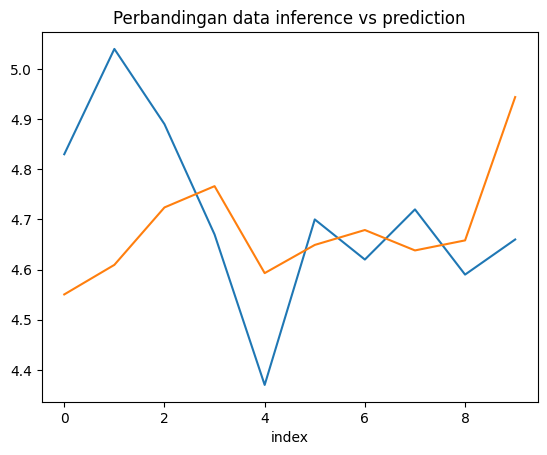

In [55]:
plt.figure
final_inf['target'].plot()
final_inf['Target - Prediction'].plot()
plt.title('Perbandingan data inference vs prediction')
plt.xlabel('index')

# 10. Kesimpulan 

Kesimpulan yang dapat ditarik dari hasil EDA dan pemodelan dengan menggunakan regresi yang berbeda adalah: Nutrisi tanaman adalah suatu zat yang sangat penting bagi produksi tanaman pertanian yang menghasilkan makanan yang sehat untuk manusia. Nutrisi yang diserap untuk tanaman digunakan untuk pertumbuhan, perkembangan dan proses reproduksi tanaman. Nutrisi yang dibutuhkan tanaman digolongkan menjadi 2 bagian, yaitu nutrisi makro dan nutrisi mikro. Nutrisi makro seperti Nitrogen (N), Phospor (P), Kalium (K), Sulfur (S), Calsium (Ca), dan Magnesium (Mg), sedangkan nutrisi mikro seperti Klor (Cl), Zat besi (Fe), Mangan (Mn), Tembaga (Cu), Seng (Zn), Boron (B), Molindenum (Mo). Terdapat 2 type sample yaitu lab 1 dan lab 2, jumlah type lab 1 lebih banyak yaitu 62,5% daripada type lab 2 sebesar 37,5%. untuk nilai target (nutrisi tanaman) terbanyak adalah 4.62 dan 4.66. Artinya, nilai nutrisi tanaman dalam kategori normal, sehingga dapat dikatakan sebagian besar tanaman dalam keadaan sehat. 
Setelah dilakukan EDA, melakukan features selection dengan menghitung korelasi pada setiap kolom, diperoleh hasil bahwa terdapat 6 kolom yang memiliki korelasi tinggi terhadap target (nutrisi tanaman). Kemungkinan besar bahwa 6 kolom tersebut adalah nutrisi makro yang memiliki pengaruh besar terhadap nutrisi tanaman karena dibutuhkan tanaman dalam jumlah besar, sedangkan 2 kolom yaitu v1 dan v3 memiliki korelasi yang rendah terhadap nutrisi tanaman dapat disimpulkan bahwa termasuk nutrisi mikro. sehingga diperoleh 7 features (+sample_type) untuk digunakan pemodelan. Terdapat 2 algoritma pemodelan yaitu Linear Regression dan XGBoost. Selanjutnya diperoleh model dengan performa yang paling baik, yaitu XGBoost. Maka, model XGBoost akan digunakan untuk model inference. Berdasarkan plot perbedaan data inference dan prediksi memiliki perbedaan nilai yang tidak begitu jauh, perbedaan nilai paling jauh yaitu 0.31. 


## Improvement 
untuk analisa lebih lanjut, kita dapat memaksimalkan model dengan hyperparameter tuning yang tepat sehingga terjadi improvement pada model baseline. 

Untuk tanaman yang masih kekurangan nutrisi dapat mengamati kondisi tanah, apakah tanah cukup lembab, terlalu lembab atau justru kering, kemudian memberi pupuk yang sesuai dengan kebutuhan tanaman. 